In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
print(df.describe())

         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


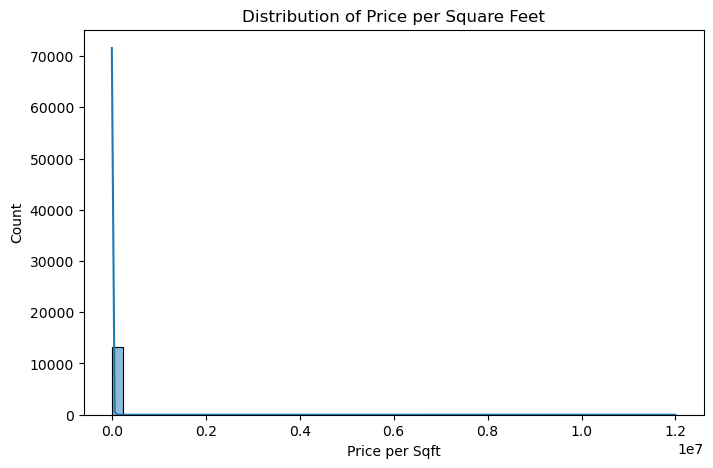

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['price_per_sqft'],bins=50,kde=True)
plt.title("Distribution of Price per Square Feet")
plt.xlabel("Price per Sqft")
plt.ylabel("Count")
plt.show()

In [6]:
mean=df['price_per_sqft'].mean()
std_dev=df['price_per_sqft'].std()
lower_limit_std=mean-(3*std_dev)
upper_limit_std=mean+(3*std_dev)
df_trim_std=df[(df['price_per_sqft']>=lower_limit_std) & (df['price_per_sqft']<=upper_limit_std)]

In [7]:
lower_limit_perc = np.percentile(df['price_per_sqft'], 1)
upper_limit_perc = np.percentile(df['price_per_sqft'], 99)

df_trim_perc = df[(df['price_per_sqft'] >= lower_limit_perc) & (df['price_per_sqft'] <= upper_limit_perc)]


In [8]:
Q1 = np.percentile(df['price_per_sqft'], 25)
Q3 = np.percentile(df['price_per_sqft'], 75)
IQR = Q3 - Q1
lower_limit_iqr = Q1 - (1.5 * IQR)
upper_limit_iqr = Q3 + (1.5 * IQR)

df_trim_iqr = df[(df['price_per_sqft'] >= lower_limit_iqr) & (df['price_per_sqft'] <= upper_limit_iqr)]


In [9]:
df['z_score'] = (df['price_per_sqft'] - mean) / std_dev
df_no_outliers_z = df[(df['z_score'] > -3) & (df['z_score'] < 3)]


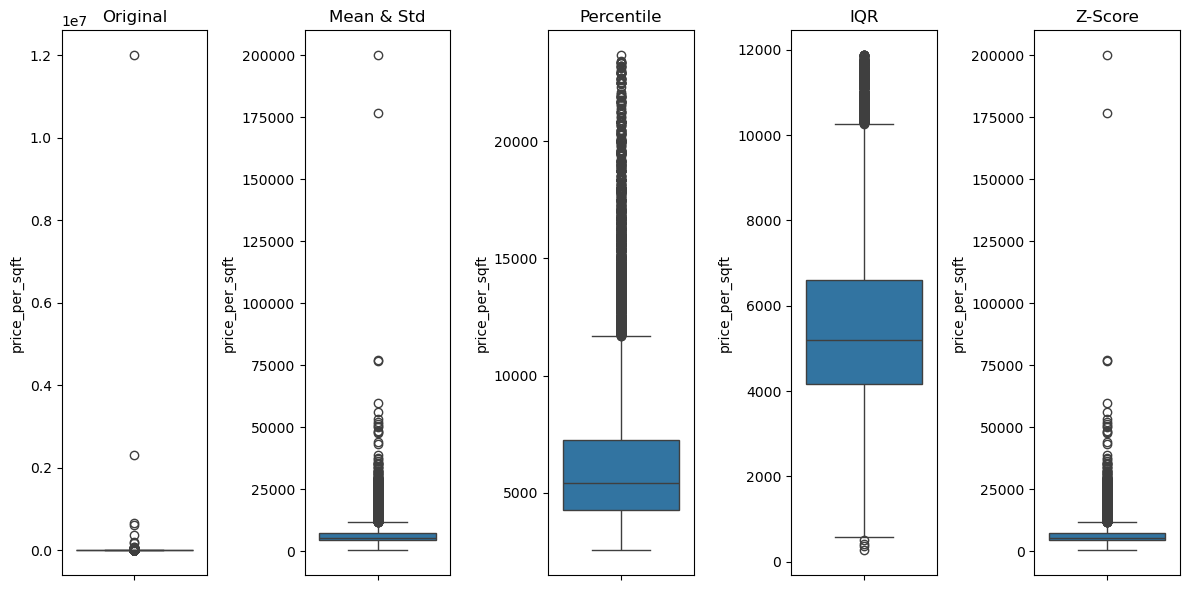

In [10]:
plt.figure(figsize=(12, 6))

# Boxplot for original data
plt.subplot(1, 5, 1)
sns.boxplot(y=df['price_per_sqft'])
plt.title("Original")

# Boxplot after Mean & Standard Deviation trimming
plt.subplot(1, 5, 2)
sns.boxplot(y=df_trim_std['price_per_sqft'])
plt.title("Mean & Std")

# Boxplot after Percentile method trimming
plt.subplot(1, 5, 3)
sns.boxplot(y=df_trim_perc['price_per_sqft'])
plt.title("Percentile")

# Boxplot after IQR method trimming
plt.subplot(1, 5, 4)
sns.boxplot(y=df_trim_iqr['price_per_sqft'])
plt.title("IQR")

# Boxplot after Z-score method trimming
plt.subplot(1, 5, 5)
sns.boxplot(y=df_no_outliers_z['price_per_sqft'])
plt.title("Z-Score")

plt.tight_layout()
plt.show()


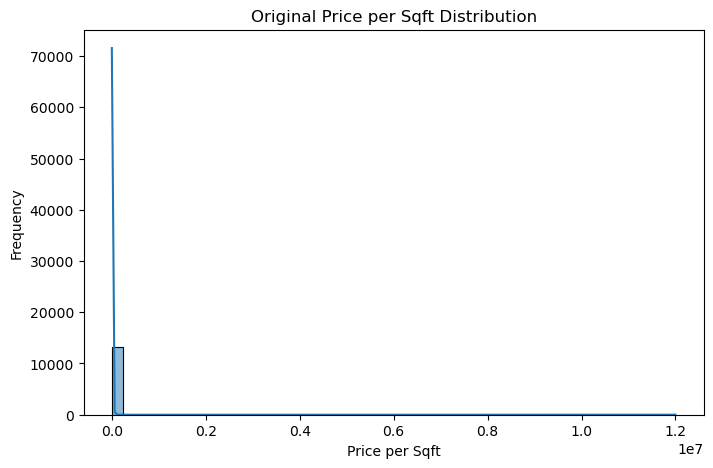

Skewness: 108.26875024325159
Kurtosis: 12090.633538860382


In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Plot Histogram & KDE
plt.figure(figsize=(8,5))
sns.histplot(df['price_per_sqft'], bins=50, kde=True)
plt.title("Original Price per Sqft Distribution")
plt.xlabel("Price per Sqft")
plt.ylabel("Frequency")
plt.show()

# Check Skewness and Kurtosis
skewness = skew(df['price_per_sqft'])
kurt = kurtosis(df['price_per_sqft'])
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")


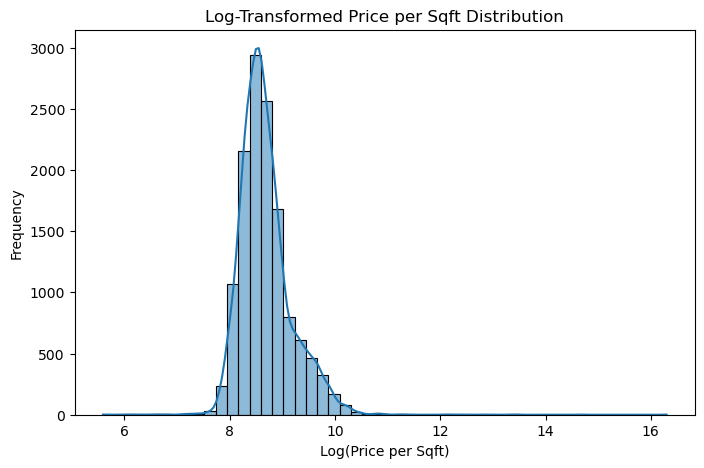

Skewness after log transform: 1.4003259019533636
Kurtosis after log transform: 9.203000543610957


In [12]:
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

plt.figure(figsize=(8,5))
sns.histplot(df['price_per_sqft_log'], bins=50, kde=True)
plt.title("Log-Transformed Price per Sqft Distribution")
plt.xlabel("Log(Price per Sqft)")
plt.ylabel("Frequency")
plt.show()

# Check Skewness and Kurtosis again
skewness_log = skew(df['price_per_sqft_log'])
kurt_log = kurtosis(df['price_per_sqft_log'])
print(f"Skewness after log transform: {skewness_log}")
print(f"Kurtosis after log transform: {kurt_log}")


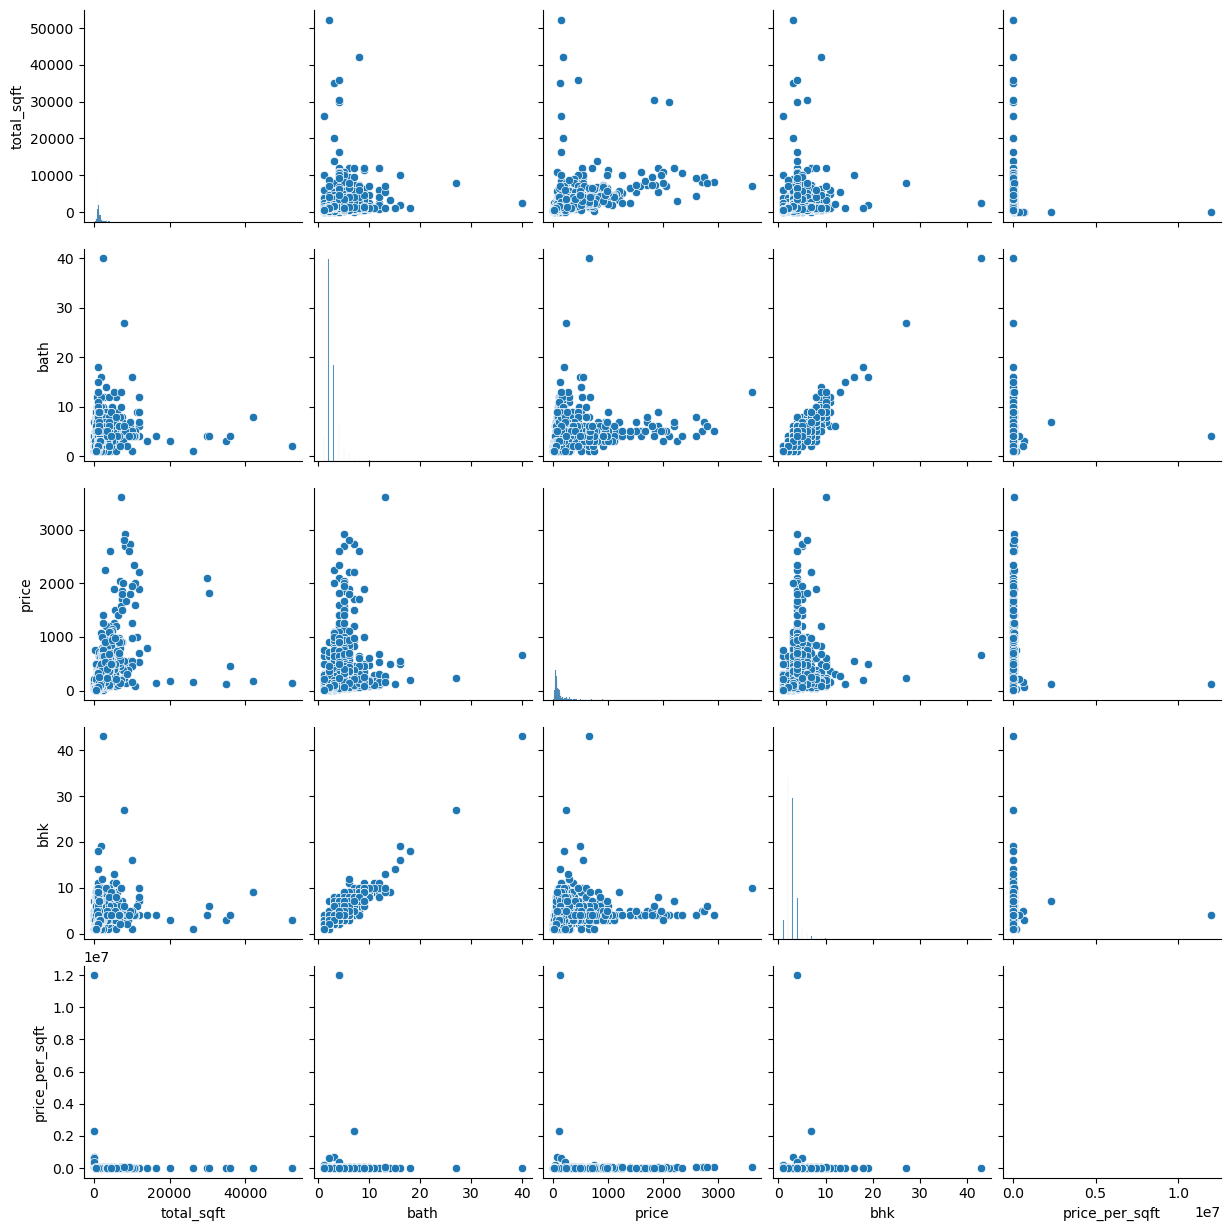

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numerical columns for correlation analysis
num_cols = ['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']

# Pairplot to visualize scatter plots between numerical variables
sns.pairplot(df[num_cols])
plt.show()


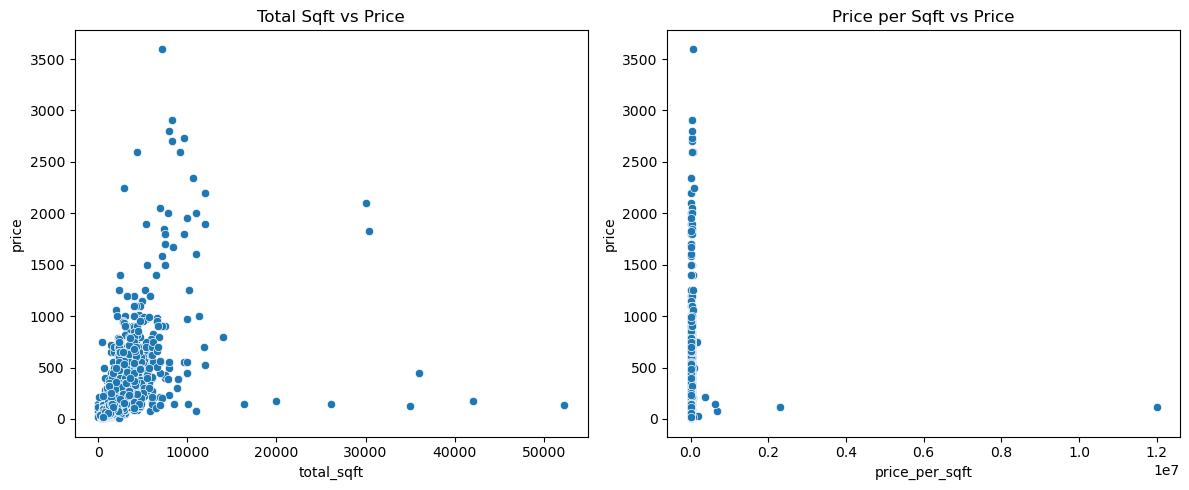

In [17]:
plt.figure(figsize=(12,5))

# Scatter plot between Total Sqft and Price
plt.subplot(1,2,1)
sns.scatterplot(x=df['total_sqft'], y=df['price'])
plt.title("Total Sqft vs Price")

# Scatter plot between Price per Sqft and Price
plt.subplot(1,2,2)
sns.scatterplot(x=df['price_per_sqft'], y=df['price'])
plt.title("Price per Sqft vs Price")

plt.tight_layout()
plt.show()


                total_sqft      bath     price       bhk  price_per_sqft
total_sqft        1.000000  0.392743  0.574330  0.346013       -0.008267
bath              0.392743  1.000000  0.455998  0.897951        0.030883
price             0.574330  0.455998  1.000000  0.396883        0.028387
bhk               0.346013  0.897951  0.396883  1.000000        0.030955
price_per_sqft   -0.008267  0.030883  0.028387  0.030955        1.000000


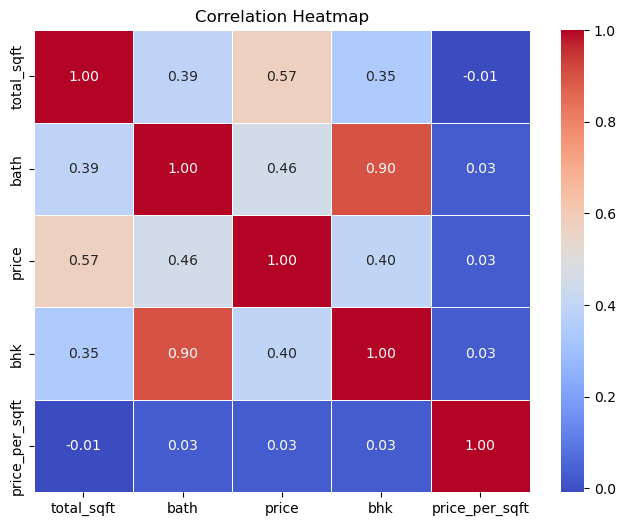

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Selecting only numerical columns
num_cols = ['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']

# Compute correlation matrix
corr_matrix = df[num_cols].corr()
print(corr_matrix)  # Print correlation values
# Plotting the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap")
plt.show()
